# Machine Learning Projekt – Pawpularity

GitHub repository: [https://github.com/GirlyPopSquad/Pawpularity](https://github.com/GirlyPopSquad/Pawpularity)

---

## Projektmedlemmer

- **Benjamin Telsing**
- **Cecilie Rye**
- **Christian Salgård Svinding**

---

## Indhold

Denne notebook er delt op i kapitler(uger).


# Uge 11 – Linear Regression & Human Detection

I denne opgave arbejdede vi med **lineær regression** og **klassifikation** baseret på PetFinder-datasættet. Målet var at udvikle en model, der kunne forudsige hvor populært et billede er ud fra **Pawpularity Score**.

Derudover trænede vi en klassifikationsmodel til at forudsige, om der er et **menneske på billedet** (`Human = 0/1`) ved hjælp af supervised learning.

## Opgaveformulering

**Kapitel 7:**

- Brug regression til at forudsige `Pawpularity`-scoren.
- Brug supervised learning-algoritmer fra pensum til at forudsige `Human`-feltet.

**Kapitel 8:**

- Evaluer modellerne med relevante performance metrics.
- Visualisér resultater.
- Test forskellige hyperparametre med GridSearchCV.

## Modeller og Evaluering

- **Regressionsmodel:** Linear Regression
- **Klassifikationsmodel:** Logistic Regression
- **Tuning:** `GridSearchCV` til systematisk søgning efter optimale hyperparametre

### Brugte metrics

| Type            | Metrics                     |
|-----------------|-----------------------------|
| Regression      | `MSE`, `R²`           |
| Klassifikation  | `Accuracy`, `Log Loss` |


## Kapitel 7 & 8

### Del 1 – Forudsig Pawpularity-Scoren (Linear Regression)

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df = pd.read_csv('Application/Data/train.csv')
X = df.drop(columns=['Id', 'Pawpularity'])
y = df[['Pawpularity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print(X_train.head())
print(y_train.head())


      Subject Focus  Eyes  Face  Near  Action  Accessory  Group  Collage  \
6258              0     1     1     1       0          0      0        0   
8188              0     1     1     1       0          0      0        0   
3043              0     1     1     0       0          0      0        1   
6609              0     0     0     0       0          0      0        0   
2395              0     0     1     1       0          0      0        0   

      Human  Occlusion  Info  Blur  
6258      0          0     0     0  
8188      0          0     0     0  
3043      0          1     1     0  
6609      0          1     0     1  
2395      0          0     0     0  
      Pawpularity
6258           85
8188           18
3043           36
6609           42
2395           28


In [115]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [116]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 433.52972167199454
R-squared: -0.0015804868794313531


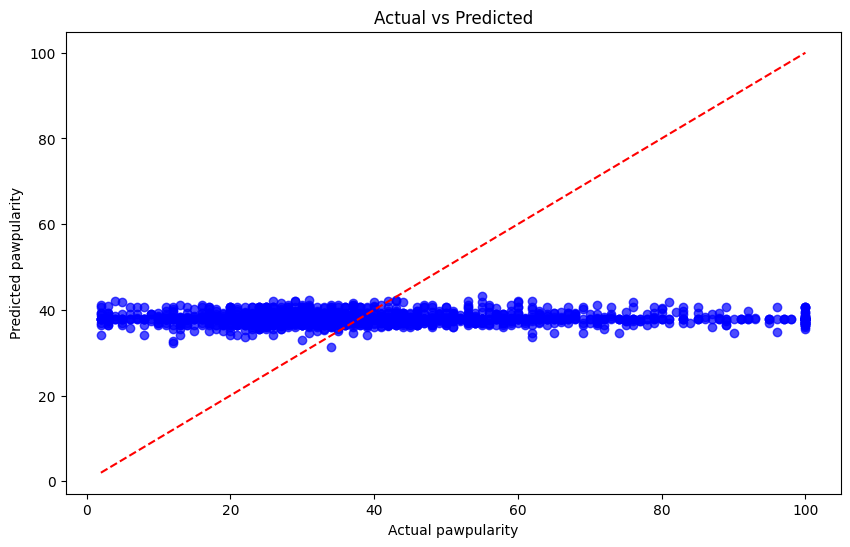

In [117]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual pawpularity')
plt.ylabel('Predicted pawpularity')
plt.show()

In [118]:
test_data = pd.read_csv('Application/Data/test.csv')
test_data = test_data.drop(columns=['Id'])

results = model.predict(test_data)

print(results)

[[36.74154432]
 [36.99355454]
 [35.92983578]
 [37.31347932]
 [34.63702597]
 [41.58550121]
 [30.92190446]
 [35.06243144]]


### Del 2 – Forudsig om der er menneske på billedet (Logistic Regression)

In [119]:
df = pd.read_csv('Application/Data/train.csv')

X = df.drop(columns=['Id', 'Human', 'Pawpularity'])
y = df['Human']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

   

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_preb_prob = model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_preb_prob)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],          
    'penalty': ['l2', 'l1'],               
    'solver': ['liblinear', 'saga']        
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2', 'l1'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

# Uge 12 – Klassifikation med Gaussian Naive Bayes

I denne opgave undersøgte vi, om det var muligt at forudsige, om et billede har høj eller lav **Pawpularity Score**, udelukkende baseret på tre udvalgte features: `Eyes`, `Face` og `Occlusion`.

## Opgaveformulering

**Kapitel 9:**

- Anvend **Bayes’ teorem** til at træne en klassifikationsmodel med `GaussianNB`.
- Reducér den originale `Pawpularity`-score (0–99) til en binær klassifikation:
  - `0`: Lav score (0–74)
  - `1`: Høj score (75–99)
- Træn modellen med features `Eyes`, `Face` og `Occlusion` og mål på `accuracy`.


In [121]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import (
    classification_report,
    accuracy_score
)

feature_names = ['Eyes', 'Face', 'Occlusion']

df = pd.read_csv('Application/Data/train.csv')
X = df[feature_names]
y = df['Pawpularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print(X.head())

print(f'Number of features in X_train: {X.shape[1]}')

   Eyes  Face  Occlusion
0     1     1          0
1     1     1          0
2     1     1          1
3     1     1          0
4     0     0          0
Number of features in X_train: 3


In [122]:
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        16
          13       0.00      0.00      0.00        20
          14       0.00      0.00      0.00        16
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00        15
          17       0.00      0.00      0.00        30
          18       0.00    

c:\Users\cecil\CodeProjects\Pawpularity\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cecil\CodeProjects\Pawpularity\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cecil\CodeProjects\Pawpularity\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is"

In [123]:
df = pd.read_csv('Application/Data/train.csv')
df['Pawpularity'] = df['Pawpularity'].apply(lambda x: 0 if x >= 75 else 1)
X = df[['Eyes', 'Face', 'Occlusion' ]]
y = df['Pawpularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [124]:
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.9248613212304589
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.92      1.00      0.96      1834

    accuracy                           0.92      1983
   macro avg       0.46      0.50      0.48      1983
weighted avg       0.86      0.92      0.89      1983



c:\Users\cecil\CodeProjects\Pawpularity\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cecil\CodeProjects\Pawpularity\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cecil\CodeProjects\Pawpularity\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

# Uge 13 – Ensemblemetoder: Bagging, Boosting & Stacking

I denne uge arbejdede vi med **ensemble learning**, hvor flere modeller kombineres for at forbedre præcisionen. Vi eksperimenterede med tre forskellige ensemble-teknikker: **Bagging**, **Boosting** og **Stacking**.

## Opgaveformulering

**Kapitel 10:**

- Brug **Bagging**, **Boosting** og **Stacking**.

## Implementering

- **BaggingClassifier:** `BaggingClassifier` med `RandomForestClassifier`
- **AdaBoostClassifier:** `AdaBoostClassifier` med `DecisionTreeClassifier`
- **StackingClassifier:** Kombinerer `LogisticRegression`, `SVC(Support Vector Classifier)` og `DecisionTreeClassifier` med en final estimator som er LogisticRegression. Den model der trænes på basemodellernes output (også kaldet meta-learner).

## Evaluering

- vi evaluerede med accuracy score og classification report



In [125]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


df = pd.read_csv('Application/Data/train.csv')

feature_names = ['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 
                 'Group', 'Collage', 'Human', 'Info', 'Blur']

X = df[feature_names]
y = df['Pawpularity']

print(df)

                                    Id  Subject Focus  Eyes  Face  Near  \
0     0007de18844b0dbbb5e1f607da0606e0              0     1     1     1   
1     0009c66b9439883ba2750fb825e1d7db              0     1     1     0   
2     0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1   
3     0018df346ac9c1d8413cfcc888ca8246              0     1     1     1   
4     001dc955e10590d3ca4673f034feeef2              0     0     0     1   
...                                ...            ...   ...   ...   ...   
9907  ffbfa0383c34dc513c95560d6e1fdb57              0     0     0     1   
9908  ffcc8532d76436fc79e50eb2e5238e45              0     1     1     1   
9909  ffdf2e8673a1da6fb80342fa3b119a20              0     1     1     1   
9910  fff19e2ce11718548fa1c5d039a5192a              0     1     1     1   
9911  fff8e47c766799c9e12f3cb3d66ad228              0     1     1     1   

      Action  Accessory  Group  Collage  Human  Occlusion  Info  Blur  \
0          0          0   

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [127]:
from sklearn.ensemble import BaggingClassifier

bagging_classifier = BaggingClassifier(n_estimators=25, random_state=30)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(n_estimators=25, random_state=30)

In [128]:
y_pred = bagging_classifier.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         7
          17       0.00      0.00      0.00         0
          18       0.00    

c:\Users\cecil\CodeProjects\Pawpularity\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cecil\CodeProjects\Pawpularity\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cecil\CodeProjects\Pawpularity\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [129]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


base = DecisionTreeClassifier(criterion='gini', max_depth=10)
model_ada = AdaBoostClassifier(n_estimators=10, random_state=42, estimator=base)
model_ada.fit(X_train, y_train)

y_pred = model_ada.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         0
          13       0.04      0.11      0.06         9
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         0
          18       0.00    

c:\Users\cecil\CodeProjects\Pawpularity\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cecil\CodeProjects\Pawpularity\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cecil\CodeProjects\Pawpularity\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


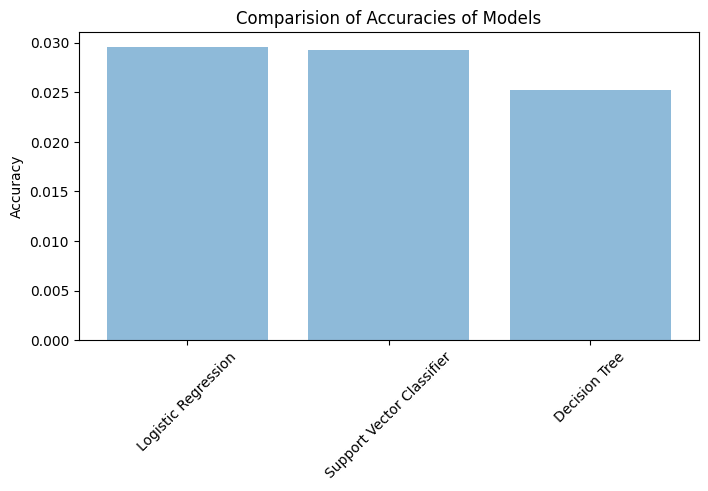

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


models = [('Logistic Regression', LogisticRegression()),
          ('Support Vector Classifier', SVC()),
          ('Decision Tree', DecisionTreeClassifier())]

accuracy_list = []

for model in models:
 model[1].fit(X_train, y_train)
 y_pred = model[1].predict(X_test)
 accuracy_list.append(accuracy_score(y_test, y_pred))
 
plt.figure(figsize=(8, 4))
model_names = [x[0] for x in models]
y_pos = range(len(models))
plt.bar(y_pos, accuracy_list, align='center', alpha=0.5)
plt.xticks(y_pos, [x[0] for x in models], rotation=45)
plt.ylabel('Accuracy')
plt.title('Comparision of Accuracies of Models')
plt.show()

In [131]:
from sklearn.ensemble import StackingClassifier
stacking_model = StackingClassifier(estimators=models,
final_estimator=LogisticRegression(), cv=5)
stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)

print(accuracy_score(y_test, y_pred))


c:\Users\cecil\CodeProjects\Pawpularity\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\cecil\CodeProjects\Pawpularity\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\cecil\CodeProjects\Pawpularity\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\cecil\CodeProjects\Pawpularity\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please als

0.02824478816408877


# Uge 14 – Dimensionalitetsreduktion og Clustering

I denne uge arbejdede vi med **dimensionalitetsreduktion** og **clustering-teknikker** på `breast_cancer`-datasættet fra `sklearn`. Vi undersøgte, hvordan man kan bruge **PCA** til at reducere datasættets dimensioner og visualisere det, samt hvordan **Agglomerative Clustering** og **K-Means** kan anvendes til at gruppere data uden brug af labels.

## Opgaveformulering

**Kapitel 11:**

- Brug **Principal Component Analysis (PCA)** til at reducere dimensionaliteten af `breast_cancer`-datasættet.
- Visualisér datasættet i 2D og analyser, hvor meget **varians** der bevares.
- Anvend **Agglomerative Clustering** til at gruppere data i **2 klasser** og sammenlign resultatet med de faktiske etiketter:
  - Visualisér resultatet med en **confusion matrix**.
- Anvend **K-Means Clustering**:
  - Bestem det **optimale antal klynger** med hjælp fra **Elbow Method**.




In [132]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
X = data.data
y = data.target

print(df)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [133]:
dataframe = pd.DataFrame(data.data, columns=data.feature_names)
print(dataframe)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

C:\Users\cecil\AppData\Local\Temp\ipykernel_5244\462537063.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_data[:, 0], pca_data[:, 1], cmap='viridis', alpha=0.7)


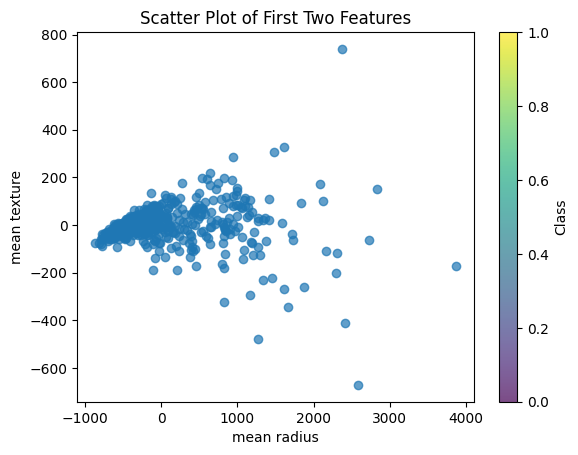

In [134]:
pca = PCA()
pca_data = pca.fit_transform(X,y)

plt.scatter(pca_data[:, 0], pca_data[:, 1], cmap='viridis', alpha=0.7)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Scatter Plot of First Two Features")
plt.colorbar(label='Class')
plt.show()

In [135]:
print(pca_data)

[[ 1.16014257e+03 -2.93917544e+02  4.85783976e+01 ...  1.29334920e-03
   1.98910417e-03  7.04378357e-04]
 [ 1.26912244e+03  1.56301818e+01 -3.53945342e+01 ... -1.34685217e-03
   6.85925212e-04 -1.06125086e-03]
 [ 9.95793889e+02  3.91567432e+01 -1.70975298e+00 ...  1.84867755e-05
  -7.75218581e-04  4.05360270e-04]
 ...
 [ 3.14501756e+02  4.75535252e+01 -1.04424072e+01 ...  2.54369636e-05
   4.83858890e-04 -2.85342702e-04]
 [ 1.12485812e+03  3.41292250e+01 -1.97420874e+01 ...  1.23547951e-03
  -8.08728729e-04  1.21655195e-03]
 [-7.71527622e+02 -8.86431064e+01  2.38890319e+01 ... -4.44552928e-03
   2.42876427e-04  1.46800350e-03]]


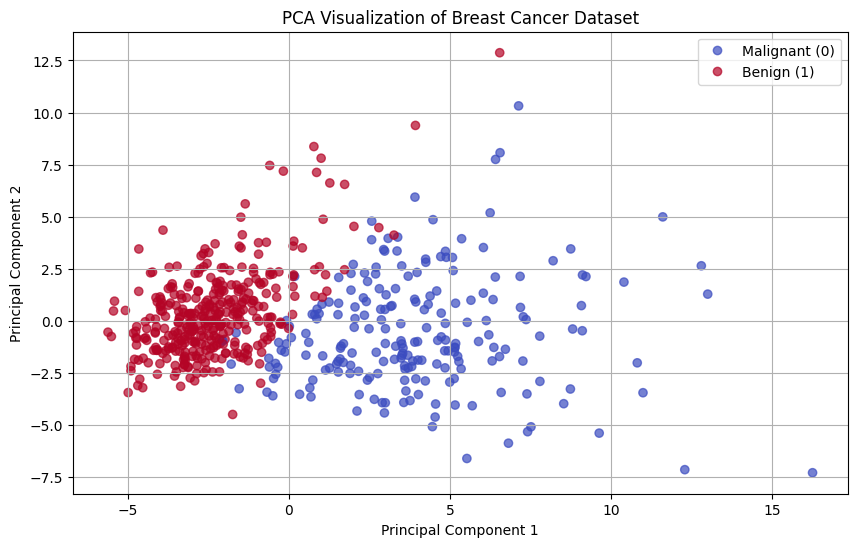

Explained variance ratio: [0.44896035 0.18472104]
Total explained variance: 0.6336813909409862
explained variance:  [13.94227406  5.73643378]


In [136]:
df["target"] = data.target

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

#Apply PCA (reduce to 2 dimensions for visualization)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

df_pca = pd.DataFrame(data_pca, columns=["PC1", "PC2"])
df_pca["target"] = df["target"]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["target"], cmap="coolwarm", alpha=0.7)

plt.legend(handles=scatter.legend_elements()[0], labels=["Malignant (0)", "Benign (1)"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Breast Cancer Dataset")
plt.grid(True)
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

print("explained variance: ", pca.explained_variance_)



   Cluster  target
0        0       0
1        0       0
2        0       0
3        0       0
4        0       0


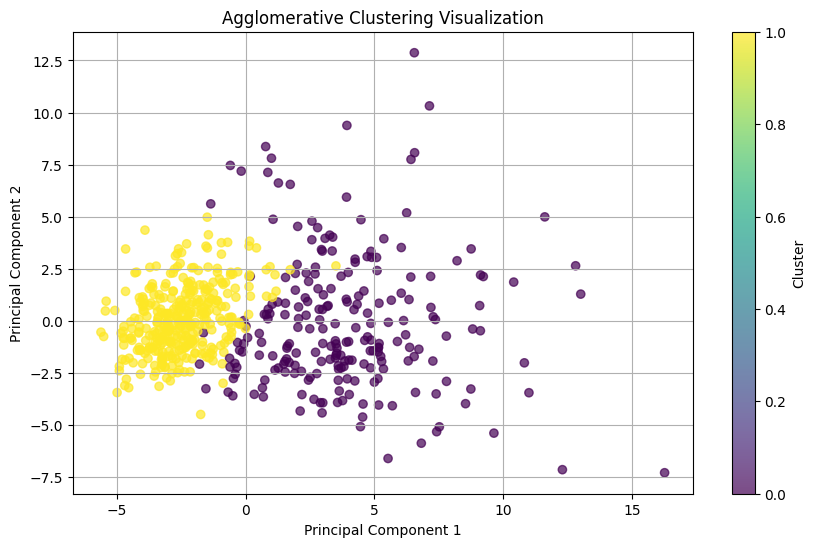

In [137]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=2)
clusters = agg_clustering.fit_predict(data_scaled)

df["Cluster"] = clusters

print(df[["Cluster", "target"]].head())

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Agglomerative Clustering Visualization")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

In [138]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

agg_clustering = AgglomerativeClustering(n_clusters=2)
clusters = agg_clustering.fit_predict(data_scaled)

df["Cluster"] = clusters

ari = adjusted_rand_score(df["target"], df["Cluster"])
nmi = normalized_mutual_info_score(df["target"], df["Cluster"])

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

Adjusted Rand Index (ARI): 0.8902
Normalized Mutual Information (NMI): 0.8216


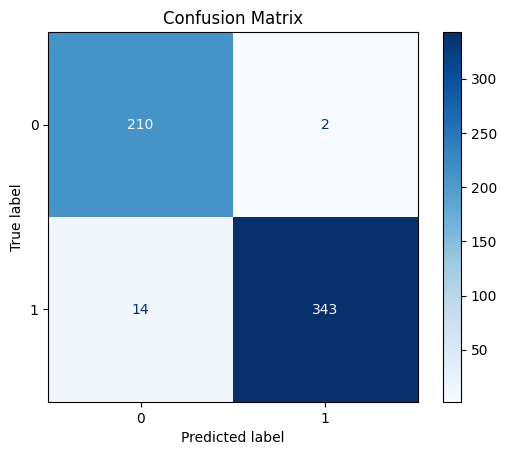

In [139]:
cm = confusion_matrix(df["target"], df["Cluster"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

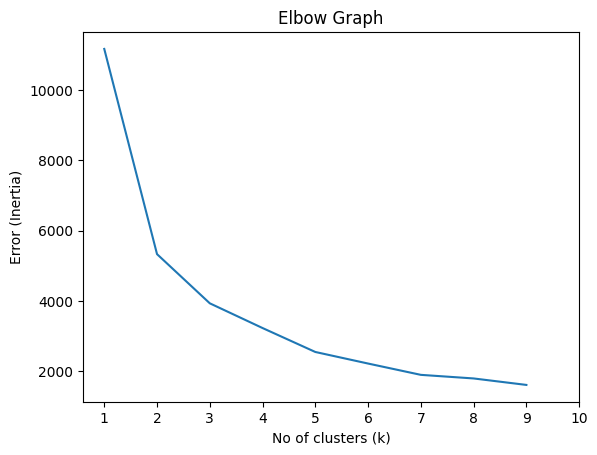

In [140]:
from sklearn.cluster import KMeans

df_pca = pd.DataFrame(data_pca, columns=["PC1", "PC2"])

error = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i).fit(df_pca)
    error.append(kmeans.inertia_)


plt.plot(range(1,10), error)
plt.title("Elbow Graph")
plt.xlabel("No of clusters (k)")
plt.ylabel("Error (Inertia)")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

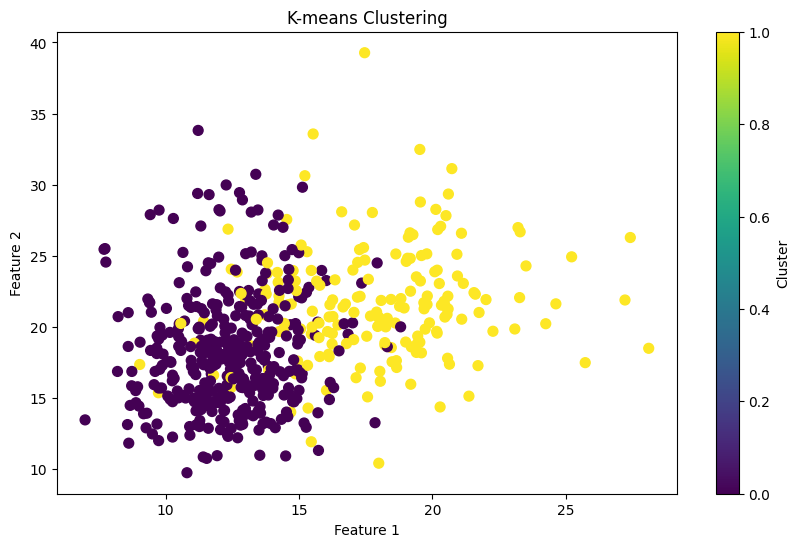

In [141]:
# From Elbow method, we can see that the optimal number of clusters is around 2.
kmeans = KMeans(n_clusters=2)  

kmeans.fit(df_pca)

if df.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
    plt.title("K-means Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(label="Cluster")
    plt.show()

# Uge 15 + 18 – Neurale Netværk og Deep Learning  

I det her kapitel arbejdede vi med **neurale netværk**.

## Opgaveformulering

**Kapitel 12 + 13:**

- Byg et **multilayer neuralt netværk (NN)** på datasættet fra tidligere:
  - Sammenlign resultatet med fx **lineær regression**.
- Byg et **multilayer neuralt netværk (NN)** fra PetFinder-billederne:
  - Brug gerne inspiration fra **MNIST-eksemplerne** i bogen.
- Eksperimentér med begreber fra kapitel 13.


## Første NN på Pawpularity

In [142]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('Application/Data/train.csv')

X = df.drop(columns=["Id", "Pawpularity"])
y = df["Pawpularity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [143]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [144]:

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [145]:
learning_rate = 0.02

epochs = 100

In [146]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

model = MLP(X_train.shape[1])


In [147]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [148]:
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 10/100, Loss: 832.7026
Epoch 20/100, Loss: 455.3945
Epoch 30/100, Loss: 448.0516
Epoch 40/100, Loss: 422.9887
Epoch 50/100, Loss: 418.7896
Epoch 60/100, Loss: 416.0985
Epoch 70/100, Loss: 415.6615
Epoch 80/100, Loss: 414.8209
Epoch 90/100, Loss: 414.2377
Epoch 100/100, Loss: 413.9120


In [149]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    mse = mean_squared_error(y_test_tensor.numpy(), predictions.numpy())
    print(f"Test MSE: {mse:.2f}")

Test MSE: 441.51


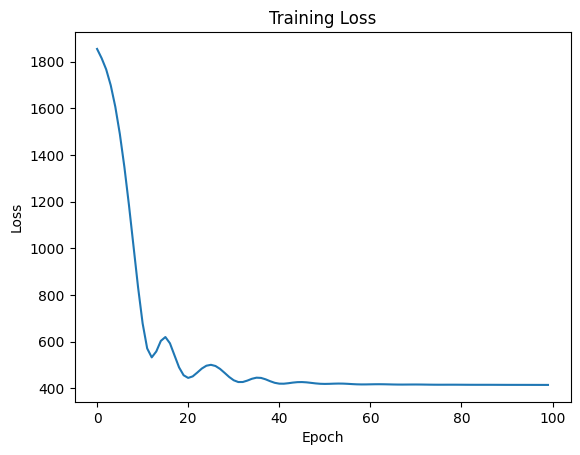

In [150]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

## Anden NN med breast cancer data

In [151]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(30, 64),  # input layer (30 features) -> hidden layer (64 neurons)
            nn.ReLU(),          
            nn.Linear(64, 1),   # hidden layer (64 neurons) -> output layer (1 neuron)
            nn.Sigmoid()        
        )
    
    def forward(self, x):
        return self.model(x)

In [152]:
data = load_breast_cancer()
X = data.data  
y = data.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [153]:
mlp = MLP()

criterion = nn.BCELoss() 
optimizer = optim.Adam(mlp.parameters(), lr=0.001)

epochs = 500
for epoch in range(epochs):
    
    outputs = mlp(X_train_tensor)
    
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()   
    loss.backward()         
    
    optimizer.step()        
    
    # Print loss every 50 iterations
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [50/500], Loss: 0.2342
Epoch [100/500], Loss: 0.1232
Epoch [150/500], Loss: 0.0873
Epoch [200/500], Loss: 0.0692
Epoch [250/500], Loss: 0.0580
Epoch [300/500], Loss: 0.0503
Epoch [350/500], Loss: 0.0440
Epoch [400/500], Loss: 0.0386
Epoch [450/500], Loss: 0.0339
Epoch [500/500], Loss: 0.0296


In [154]:
with torch.no_grad():  # Disable gradient tracking during testing
    y_pred = mlp(X_test_tensor)  
    y_pred_class = (y_pred > 0.5).float()  # Convert to binary 

    accuracy = (y_pred_class == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")

Test Accuracy: 98.25%


## Tredje NN på pawpularity data

In [155]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import transforms

In [156]:
class PawpularityDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_id = self.data.iloc[idx]['Id']
        img_path = os.path.join(self.img_dir, f"{img_id}.jpg")
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)
        
        label = torch.tensor(self.data.iloc[idx]['Pawpularity'], dtype=torch.float32)
        return image, label


In [157]:
mytransform = transforms.Compose([
    transforms.Resize((64, 64)),     
    transforms.ToTensor()
])

dataset = PawpularityDataset("Application/Data/train.csv", "Application/Data/train", transform=mytransform)

subset = Subset(dataset, indices=range(int(0.2 * len(dataset))))
train_loader = DataLoader(subset, batch_size=32, shuffle=True)

dataiter = iter(train_loader)
images, labels = next(dataiter)
print(f"Batch size: {images.shape}, Labels shape: {labels.shape}")

Batch size: torch.Size([32, 3, 64, 64]), Labels shape: torch.Size([32])


In [158]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(3 * 64 * 64, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Linear(64, 1)  
)

lossfn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

iterations = 10
losses = []

In [ ]:
for epoch in range(iterations):
    running_loss = 0
    for images, labels in train_loader:
        images = images.view(images.size(0), -1)  
        optimizer.zero_grad()
        outputs = model(images).squeeze()
        loss = lossfn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1} - Training loss: {avg_loss:.4f}")
    losses.append(avg_loss)


Epoch 1 - Training loss: 695.5993
Epoch 2 - Training loss: 504.7461
Epoch 3 - Training loss: 506.2246
Epoch 4 - Training loss: 495.7944
Epoch 5 - Training loss: 499.2797
Epoch 6 - Training loss: 496.8595
Epoch 7 - Training loss: 492.4181
Epoch 8 - Training loss: 493.6253


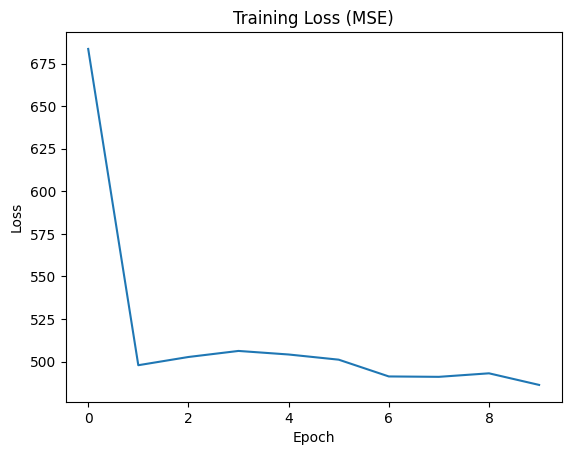


Predicted Pawpularity: 35.68, Actual: 43.0


In [ ]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss (MSE)")
plt.show()

with torch.no_grad():
    sample_img = images[0].view(1, -1) 
    prediction = model(sample_img).item()
    actual = labels[0].item()
    print(f"\nPredicted Pawpularity: {prediction:.2f}, Actual: {actual}")

# Uge 19 – Convolutional Neural Networks (CNN) til Billedklassifikation


Grundet vores billeder ikke er labelet med cat/dog, så valgte vi at gøre det ud fra om der var et menneske på eller ej.
Dette gør også at vi har en bedre version af uge 10 opgaven hvor vi skulle bruge supervised learning til at finde ud af om der var et menneske eller ej

Denne uge arbejdede vi med at bygge og træne et **Convolutional Neural Network (CNN)** til at afgøre, om et billede fra PetFinder indeholder et **menneske eller ej**.

## Opgaveformulering

- Byg og træn et CNN på PetFinder-billederne med fokus på binær klassifikation (menneske eller ikke menneske).
- Eksperimenter med centrale begreber fra kapitel 14.




In [ ]:
import os
import torch
import torch.nn as nn
import pandas as pd
import random
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

csv_path = 'Application/Data/train.csv'
image_dir = 'Application/Data/train'
batch_size = 8
learning_rate = 0.001
num_epochs = 20
num_classes = 2

all_transforms = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2023, 0.1994, 0.2010])
])

In [ ]:
class HumanPresenceDataset(Dataset):
    def __init__(self, csv_file, image_dir, transform=None):
        self.data_frame = pd.read_csv(csv_file)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_id = self.data_frame.iloc[idx]['Id']
        label = int(self.data_frame.iloc[idx]['Human'])
        img_path = os.path.join(self.image_dir, img_id + ".jpg")

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
class ConvNeuralNet(nn.Module):
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 32, 3)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.conv4 = nn.Conv2d(64, 64, 3)
        self.pool2 = nn.MaxPool2d(2, 2)

        dummy_input = torch.zeros(1, 3, 32, 32)
        x = self._forward_conv(dummy_input)
        self.flattened_size = x.view(-1).size(0)

        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def _forward_conv(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.pool1(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.pool2(x)
        return x

    def forward(self, x):
        x = self._forward_conv(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
df = pd.read_csv(csv_path).sample(n=500, random_state=42).reset_index(drop=True)

df['Human'] = pd.to_numeric(df['Human'], errors='coerce')
df = df[df['Human'].isin([0, 1])].dropna()

class HumanPresenceDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.data_frame = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_id = self.data_frame.iloc[idx]['Id']
        label = int(self.data_frame.iloc[idx]['Human'])
        img_path = os.path.join(self.image_dir, img_id + ".jpg")
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

dataset = HumanPresenceDataset(dataframe=df, image_dir=image_dir, transform=all_transforms)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

model = ConvNeuralNet(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.005)

In [ ]:
print(" Training model...")
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

🔁 Training model...
Epoch [1/20], Loss: 0.5705
Epoch [2/20], Loss: 0.4349
Epoch [3/20], Loss: 0.4310
Epoch [4/20], Loss: 0.4272
Epoch [5/20], Loss: 0.4239
Epoch [6/20], Loss: 0.4226
Epoch [7/20], Loss: 0.4179
Epoch [8/20], Loss: 0.4232
Epoch [9/20], Loss: 0.4149
Epoch [10/20], Loss: 0.4106
Epoch [11/20], Loss: 0.4118
Epoch [12/20], Loss: 0.4051
Epoch [13/20], Loss: 0.4040
Epoch [14/20], Loss: 0.4003
Epoch [15/20], Loss: 0.3985
Epoch [16/20], Loss: 0.3916
Epoch [17/20], Loss: 0.3843
Epoch [18/20], Loss: 0.3857
Epoch [19/20], Loss: 0.3778
Epoch [20/20], Loss: 0.3690


In [ ]:
print("Evaluating on test data...")

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")



✅ Evaluating on test data...
🎯 Test Accuracy: 86.00%


In [ ]:
# Predict on a random image from the folder
print("\n Predicting on a random image...")

# Load image file names
all_filenames = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
random_filename = random.choice(all_filenames)
image_path = os.path.join(image_dir, random_filename)

# Load and preprocess image
image = Image.open(image_path).convert("RGB")
transformed_image = all_transforms(image).unsqueeze(0).to(device)

# Run inference
model.eval()
with torch.no_grad():
    output = model(transformed_image)
    _, prediction = torch.max(output, 1)
    label = prediction.item()

# Output result
print(f" File: {random_filename}")
print(f" Model Prediction: {'Human' if label == 1 else 'No Human'}")


🔍 Predicting on a random image...
📷 File: 600a30a5f1db8b6e8e007c6b818b432b.jpg
🧠 Model Prediction: No Human


# Uge 20 + 21 – Recurrent Neural Networks (RNN) til Patientdata

I disse uger arbejdede vi med at bygge og træne en **LSTM-model** på breast-cancer datasættet, hvor målet var at klassificere patienter som raske (benign) eller med kræft (malign).

## Opgave

- Byg en RNN-model og træn modellen med de 100 datasæt. Evaluer modellen og afprøv den med nye (ikke test eller træningsdata) data. 
- Eksperimenter med forskellige værdier af hyper-parametre og modelarkitektur, herunder LSTM, GRU og anden optimizer samt loss-funktion.

Vi har valgt at fokusere på LSTM modellen og har derfor ikke et eksempel på RNN-model.


In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data = load_breast_cancer()
X = data.data 
y = data.target

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X = X.reshape((X.shape[0], X.shape[1], 1))  

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

BATCH_SIZE = 32
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.lstm(x)         
        out = out[:, -1, :]           
        out = self.fc(out)
        return out

INPUT_SIZE = 1      
SEQ_LENGTH = 30      
HIDDEN_SIZE = 64
NUM_LAYERS = 1
NUM_CLASSES = 2
NUM_EPOCHS = 20
LEARNING_RATE = 0.01

model = LSTMClassifier(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, NUM_CLASSES)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

print(" Training model...")
for epoch in range(NUM_EPOCHS):
    for X_batch, y_batch in train_loader:
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {loss.item():.4f}")

with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).float().mean()
    print(f"\n Test Accuracy: {accuracy.item() * 100:.2f}%")


🔁 Training model...
Epoch [1/20], Loss: 0.7298
Epoch [2/20], Loss: 0.6110
Epoch [3/20], Loss: 1.3737
Epoch [4/20], Loss: 0.7237
Epoch [5/20], Loss: 0.4960
Epoch [6/20], Loss: 0.6865
Epoch [7/20], Loss: 0.5546
Epoch [8/20], Loss: 0.4750
Epoch [9/20], Loss: 0.7624
Epoch [10/20], Loss: 0.6883
Epoch [11/20], Loss: 0.6179
Epoch [12/20], Loss: 0.6106
Epoch [13/20], Loss: 0.6212
Epoch [14/20], Loss: 0.4993
Epoch [15/20], Loss: 0.6092
Epoch [16/20], Loss: 0.6142
Epoch [17/20], Loss: 0.6869
Epoch [18/20], Loss: 0.6759
Epoch [19/20], Loss: 0.5060
Epoch [20/20], Loss: 0.1819

✅ Test Accuracy: 65.79%


In [ ]:
# Example unseen patient data (same 30 features format)
new_sample = [
    17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
    1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
    25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189
]

new_sample_scaled = scaler.transform([new_sample])
new_sample_tensor = torch.tensor(new_sample_scaled.reshape(1, 30, 1), dtype=torch.float32)

model.eval()
with torch.no_grad():
    output = model(new_sample_tensor)
    predicted = torch.argmax(output, dim=1).item()

print("Prediction:", "Benign (1)" if predicted == 1 else "Malignant (0)")


🧾 Prediction: Malignant (0)
